In [2]:
# imports and settings

from nltk.corpus import brown, stopwords
from nltk.probability import FreqDist
from nltk.tokenize import wordpunct_tokenize
from matplotlib import pyplot as plt
from matplotlib import rcParams
import wikipedia

from common.nltkhelpers import plot_freqdist_freq    # TAKE from the gists

rcParams['figure.figsize'] = (15, 9)
rcParams['lines.linewidth'] = 3
rcParams['font.family'] = 'serif'
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 14

%matplotlib inline
plt.style.use('ggplot')

en_stopwords = stopwords.words('english')                             # the English stopwords

wikipedia.set_lang('en')                                              # we'll extract pages from the English Wikipedia

# Quantifying English

### Getting the Brown Corpus data

In [3]:
# The Brown Corpus

brown_words = [word.lower() for word in brown.words() if word.isalpha()]
print 'Number of tokens in Brown corpus', len(brown_words)
print 'Number of unique tokens in Brown corpus', len(set(brown_words))

brown_words_nonstop = [word for word in brown_words if word not in en_stopwords]
print 'Number of tokens in Brown corpus excluding stopwords', len(brown_words_nonstop)

Number of tokens in Brown corpus 981716
Number of unique tokens in Brown corpus 40234
Number of tokens in Brown corpus excluding stopwords 509267


### Freq Distrib of words in the Brown corpus

In [4]:
fdist = FreqDist(brown_words)
plot_freqdist_freq(fdist, max_num=50, title='Freq of the 50 most common words in Brown Corpus')

fdist = FreqDist(brown_words_nonstop)
plot_freqdist_freq(fdist, max_num=50, title='Freq of the 50 most common words in Brown Corpus, excluding stopwords')

NameError: name 'plot_freqdist_freq' is not defined

### Getting content from a collection of random Wikipedia pages

In [78]:
num_pages = 100      # choose the number of pages to query for

random_w_titles = wikipedia.random(pages=num_pages)
wiki_words = []

for page_title in random_w_titles:
    try:
        wiki_words += wordpunct_tokenize(wikipedia.page(title=page_title).content)
    except wikipedia.exceptions.DisambiguationError, wikipedia.exceptions.PageError:
        pass
    if random_w_titles.index(page_title) % 10 == 0:
        print random_w_titles.index(page_title)
        
wiki_words = [word.lower() for word in wiki_words if word.isalpha()]
wiki_words_nostop = [word for word in wiki_words if word not in en_stopwords]

0
10
20
30
40
50
60
70
80
90


In [79]:
print len(wiki_words)
print wiki_words[:50]

26923
[u'stuart', u'burrell', u'stu', u'lantz', u'born', u'july', u'is', u'a', u'retired', u'american', u'basketball', u'player', u'and', u'the', u'current', u'television', u'commentator', u'for', u'the', u'los', u'angeles', u'lakers', u'of', u'the', u'national', u'basketball', u'association', u'nba', u'on', u'time', u'warner', u'cable', u'sportsnet', u'he', u'has', u'been', u'the', u'lakers', u'color', u'commentator', u'since', u'sharing', u'the', u'microphone', u'with', u'chick', u'hearn', u'paul', u'sunderland', u'joel']


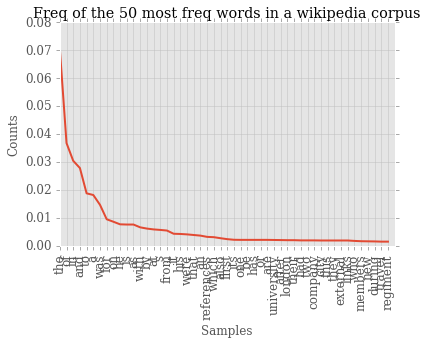

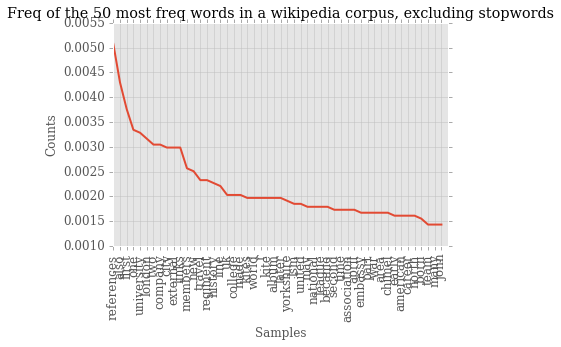

In [80]:
fdist = FreqDist(wiki_words)
plot_freqdist_freq(fdist, max_num=50, title='Freq of the 50 most freq words in a wikipedia corpus')

fdist = FreqDist(wiki_words_nostop)
plot_freqdist_freq(fdist, max_num=50, title='Freq of the 50 most freq words in a wikipedia corpus, excluding stopwords')

In [81]:
print random_w_titles

[u'Stu Lantz', u'Mentone Beach', u'White Shoes & The Couples Company (album)', u'Dealchecker', u'Tony Chimel', u'Ahmad Maulana Putra', u'List of towns and villages in Kiribati', u'Pinhas Inbari', u'Albert Hauck', u'Bunomys', u'L-type asteroid', u'Yogana', u'GameLab London', u'Gorz\u0119cino', u'Gravelines Nuclear Power Station', u'Harold Washington College', u'List of diplomatic missions of Eritrea', u'Bijarwadh', u'Sport kite', u'Pro domo', u'Li Jianbin', u'Journal of Colloid and Interface Science', u'Cork City North-West (D\xe1il \xc9ireann constituency)', u'The Photos', u'Microsuperman', u'Nicolas Dipre', u'Hans-Karl Mayer', u'Ar\u0219i\u021ba River (Ciughe\u0219)', u'Piano Trio in A major (attributed to Brahms)', u'Polmak Church', u'1984 Minnesota Golden Gophers football team', u'Yorkshire Hussars', u'Juice Latham', u'Anne Barton', u'Desert Breath', u'Mark Stanway', u'Thomas Emmerson', u'Australian Association for the Teaching of English', u'A+B Kasha', u'Grandhotel (novel)', u'Nep

In [85]:
brown.categories()

brown.

u'BROWN CORPUS\n\nA Standard Corpus of Present-Day Edited American\nEnglish, for use with Digital Computers.\n\nby W. N. Francis and H. Kucera (1964)\nDepartment of Linguistics, Brown University\nProvidence, Rhode Island, USA\n\nRevised 1971, Revised and Amplified 1979\n\nhttp://www.hit.uib.no/icame/brown/bcm.html\n\nDistributed with the permission of the copyright holder,\nredistribution permitted.\n'